# Data Visualization/Exploratory Data Analysis

## 1. classify variables by their type: quantitative vs. categorical

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
df=pd.read_csv("../../Dataset/adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [18]:
df.replace(to_replace='?',value=np.nan,inplace=True)
df.fillna(np.nan)
df=df.dropna()
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


### Categorical Data

In [19]:
categorical_data=df.select_dtypes(include='object')
categorical_data.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [20]:
df['workclass'].unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [21]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [22]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [23]:
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [24]:
df['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [25]:
df['race'].unique()

array(['Black', 'White', 'Other', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander'], dtype=object)

In [26]:
df['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [27]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

### Continuous Data

In [4]:
numerical_data=df.select_dtypes(include = 'number')
numerical_data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30


In [28]:
df['age'].unique()

array([25, 38, 28, 44, 34, 63, 24, 55, 65, 36, 26, 48, 43, 20, 37, 45, 22,
       23, 54, 32, 46, 56, 17, 29, 39, 52, 18, 21, 42, 33, 30, 47, 41, 19,
       69, 50, 31, 59, 49, 58, 40, 27, 57, 61, 51, 73, 53, 80, 62, 35, 72,
       64, 68, 66, 60, 67, 71, 70, 90, 77, 81, 74, 78, 82, 75, 85, 76, 89,
       83, 79, 88, 87, 84, 86], dtype=int64)

In [29]:
df['fnlwgt'].unique()

array([226802,  89814, 336951, ..., 199655, 255835, 257302], dtype=int64)

In [30]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1],
      dtype=int64)

In [31]:
df['capital-gain'].unique()

array([    0,  7688,  3103,  6418,  7298,  3908, 14084,  5178, 15024,
        2597,  2907,  4650,  6497,  5013, 27828,  4934,  4064,  3674,
        2174, 10605, 99999,  1055,   114,  2580,  3411,  4508,  4386,
        8614, 13550,  6849,  2463,  3137,  2885,  2964,  1471, 10566,
        2354,  1424,  1455,  3325,  4416, 25236,  4787,  2829,  4865,
        1264,  1506,   594, 10520,  3464, 20051,  4101,  1797,  2407,
        3471,  2653,  1086,  1848, 14344,  1151,  2993,  2290, 15020,
        9386,  2202,  3818,  2176,  5455,  3418, 11678,  7978,  7262,
        6514, 41310,  3456,  7430,  2062, 34095,  1831,  6723,  5060,
       15831,  2977,  2346,  3273,  2329,  9562,  2105,  2635,  2414,
        4931,  1731,  6097,   914,  7896,  5556,  3781,  3942,  2538,
        3887,  1409, 25124,  7443,  5721,   401,  1173,  4687,  6767,
         991,  2036,  2050,  2961,  2228, 22040,  2936,  6360,  2009,
        3432,  1639, 18481,  2387], dtype=int64)

In [32]:
df['capital-loss'].unique()

array([   0, 1721, 1876, 2415, 1887,  625, 1977, 2057, 1429, 1590, 1485,
       2051, 2377, 1672, 1628, 1902, 1741, 2444, 1408, 2001, 2042, 1740,
       1825, 1848, 1719, 3004, 2179, 1573, 2205, 1258, 2339, 1726, 2258,
       1340, 1504, 2559, 1668, 1974, 1980, 1564, 2547, 2002, 1669, 1617,
        323, 1602, 3175, 2472, 1579, 2129, 1735, 2282, 1870, 1911, 1092,
       1762, 2457, 2231, 2238,  653, 1138, 2246, 2603, 2392, 1510, 1944,
       1380, 1421, 3770, 1594,  213, 2824, 2174, 1844, 2149, 1411, 2467,
       2163, 1651, 1816, 2206, 2352, 1539,  880,  810,  974, 1648, 1755,
       3683, 4356, 2267, 2080,  419,  155, 3900, 2201, 2754], dtype=int64)

In [33]:
df['hours-per-week'].unique()

array([40, 50, 30, 32, 10, 39, 48, 25, 20, 47, 35, 43, 90, 54, 60, 38, 45,
       36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37, 12, 70, 15, 75,
       52, 84, 42, 80,  8, 68, 99, 65, 17, 72, 53, 96, 21, 46,  3,  1, 49,
       67, 76, 23,  2, 58, 26, 34,  4,  7, 51, 78, 63,  5, 31, 92, 77, 27,
       29, 85,  6, 13, 19, 98, 62, 66, 57, 86, 11, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95], dtype=int64)

## 2. Handle categorical variables with numerically coded values

### Income and Gender column needs to coded in numerical way as:
#### less than 50K:0
#### greater than 50K:1
#### Male:1
#### Female:0

In [36]:
#modified all the values of income having "<=50K" to 0
df.loc[df['income']=='<=50K','income']=0

In [37]:
#modified all the values of income having ">50K" to 1
df.loc[df['income']=='>50K','income']=1
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [38]:
# modified all the values of gender having "Male" to 1 and "Female" to 0
df['gender_numeric'] = np.where(df['gender'] == 'Male', 1, np.where(df['gender'] == 'Female', 0, df['gender']))
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,gender_numeric
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0,1


In [39]:
del df['gender']

In [40]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income,gender_numeric
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States,0,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States,0,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,1,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,United-States,1,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,0,0,30,United-States,0,1


In [41]:
# modify marital status column to specific variables
df['marital-status'].replace(['Married-civ-spouse'], 'Married', inplace=True)
df['marital-status'].replace('Never-married', 'Not-married', inplace=True)
df['marital-status'].replace(['Divorced'], 'Separated', inplace=True)
df['marital-status'].replace(['Widowed'], 'Separated', inplace=True)
df['marital-status'].replace(['Separated'], 'Separated', inplace=True)
df['marital-status'].replace(['Married-spouse-absent'], 'Not-married', inplace=True)
df['marital-status'].replace(['Married-AF-spouse'], 'Married', inplace=True)
df['marital-status'].unique()

array(['Not-married', 'Married', 'Separated'], dtype=object)

In [42]:
df.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income,gender_numeric
0,25,Private,226802,11th,7,Not-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States,0,1
1,38,Private,89814,HS-grad,9,Married,Farming-fishing,Husband,White,0,0,50,United-States,0,1


In [43]:
#modify workclass to specific job varities
df.workclass = df.workclass.replace({'Self-emp-not-inc': 'Self-emp',
                                        'Self-emp-inc': 'Self-emp',
                                        'Local-gov': 'Gov',
                                        'Federal-gov': 'Gov',
                                        'State-gov': 'Gov'})
df.workclass.unique()

array(['Private', 'Gov', 'Self-emp', 'Without-pay'], dtype=object)

In [44]:
modified_data=df.copy()

## 3. Perform univariate and bivariate analysis and derive meaningful insights about the dataset

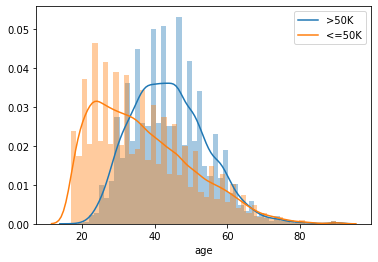

In [46]:
sns.distplot(df[df['income'] == 1]['age'], kde_kws={"label": ">50K"})
sns.distplot(df[df['income'] == 0]['age'], kde_kws={"label": "<=50K"})

#### It is shown from the above analysis that while majority of the earning class is in 20-40 years of age, the person who have income greater than 50k belong to 40+ age in majority

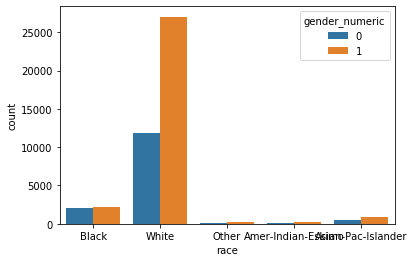

In [48]:
x, y, hue = "race", "count", "gender_numeric"

sns.countplot(x=x, hue=hue, data=df)

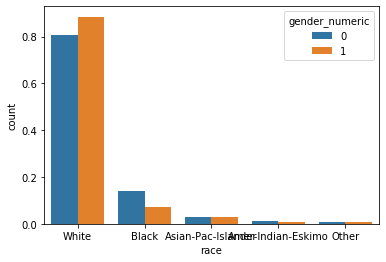

In [49]:
prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)

plt.show()

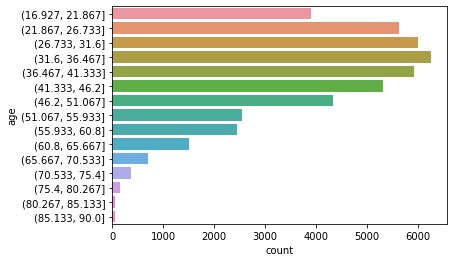

In [52]:
temp_df = pd.DataFrame()
temp_df['age'] = pd.cut(df['age'], 15)
sns.countplot(y = 'age', data=temp_df)

#### It is depicted from the above analysis that the majority of people in the dataset belong to age group 20years to 40years

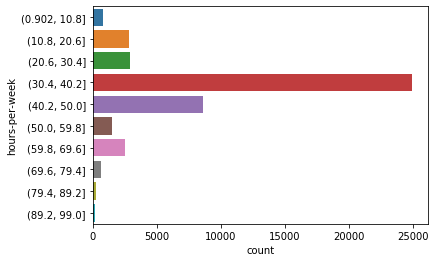

In [53]:
temp_df['hours-per-week'] = pd.cut(df['hours-per-week'], 10)
# suitable cut will be 10 because range is 0 to 100.

sns.countplot(y="hours-per-week", data=temp_df)

#### The above analysis shows that majority of the working class dedicates arounf 30 to 40 hours per week to their work, which can be roughly estimated to be around 8 hrs a day for 5 working days

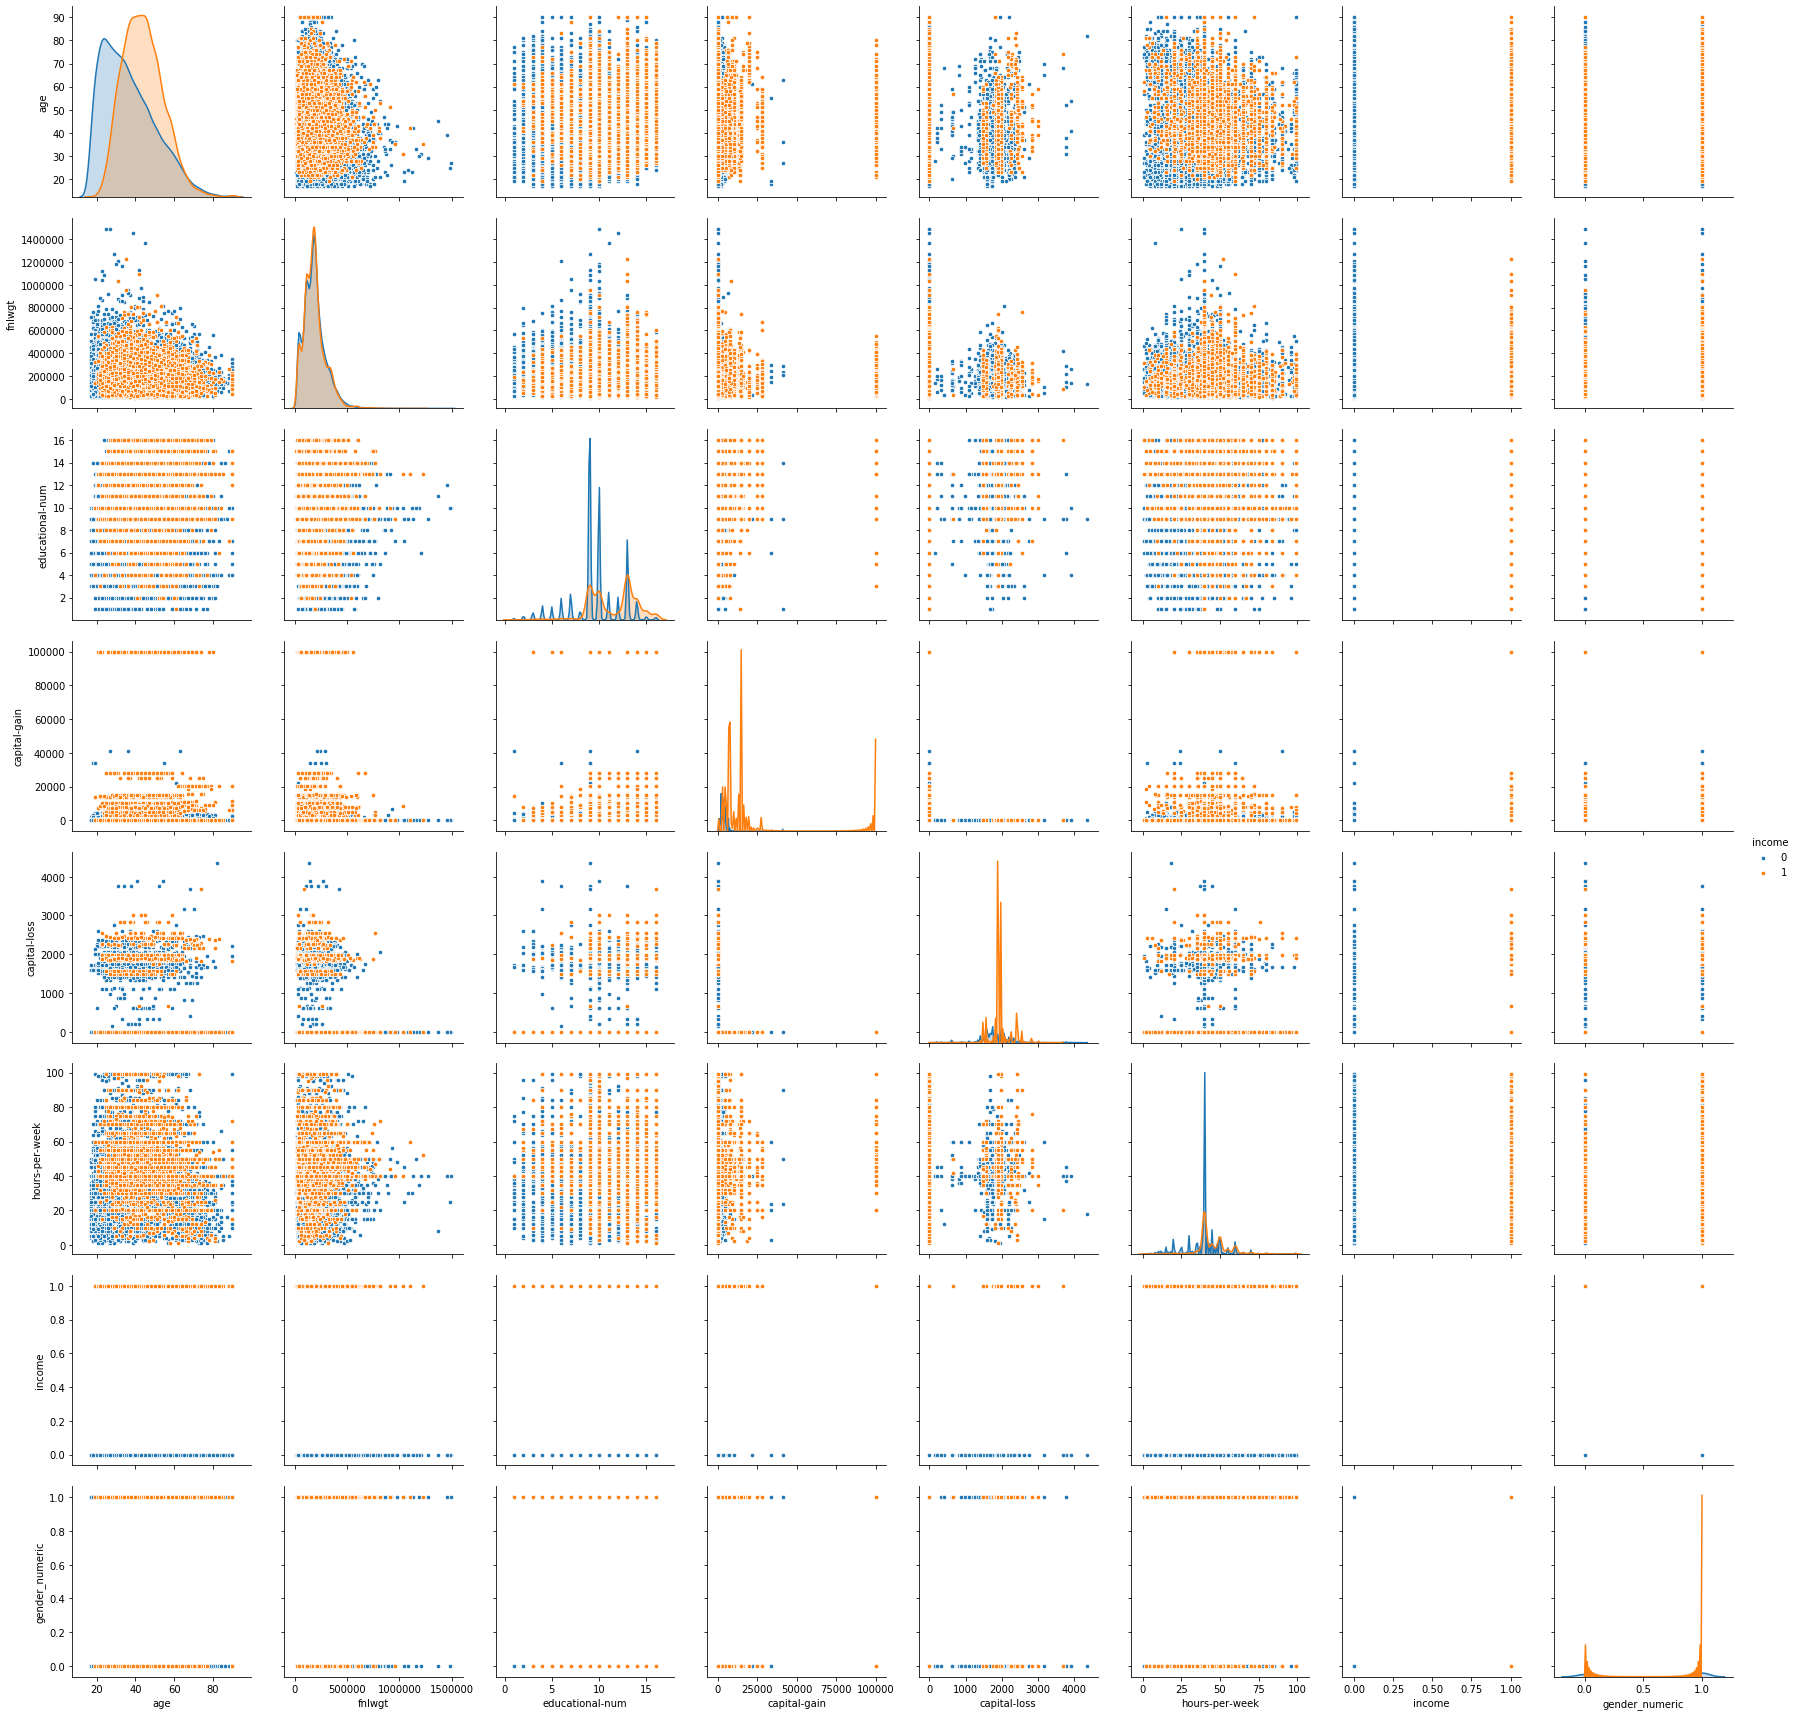

In [59]:

# PAirplot of entire dataset

sns.pairplot(df, hue = 'income', height=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )

(20, 60)

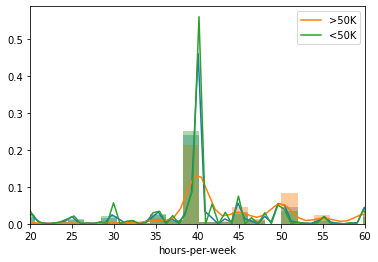

In [57]:
sns.distplot(df['hours-per-week']);
sns.distplot(df[df['income'] == 1]['hours-per-week'], kde_kws={"label": ">50K"})
sns.distplot(df[df['income'] == 0]['hours-per-week'], kde_kws={"label": "<50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

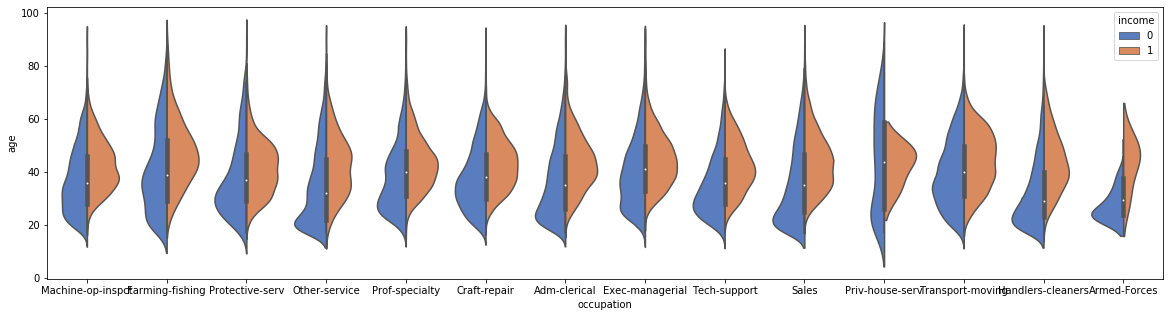

In [60]:
a4_dims = (20, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x="occupation", y="age", hue="income",data=df, gridsize=100, palette="muted", split=True)

#### The general trend is that more senior workers have higher salaries. Armed-forces don't have a high job salaries

#### It is also evident that the private housing have most age variation but the income range for the variation is still nominal means there is not much income in it

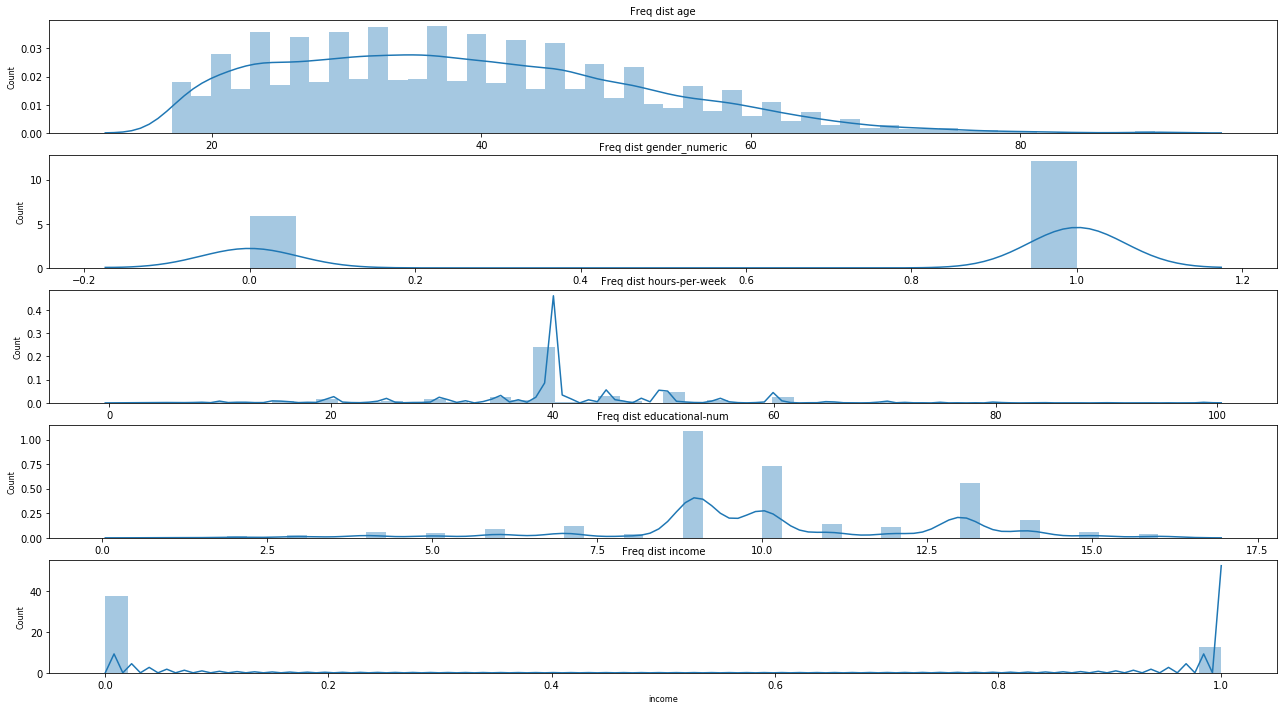

In [63]:
col_names = ['age', 'gender_numeric', 'hours-per-week', 'educational-num', 'income']

fig, ax = plt.subplots(len(col_names), figsize=(22,12))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

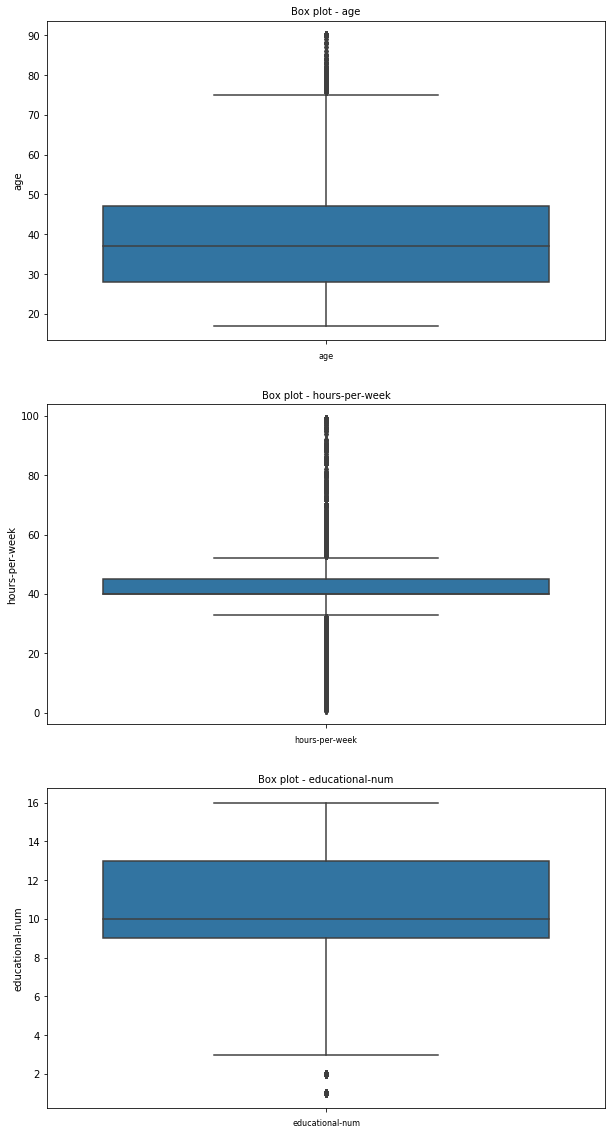

In [65]:

col_names = ['age', 'hours-per-week', 'educational-num']

fig, ax = plt.subplots(len(col_names), figsize=(10,20))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

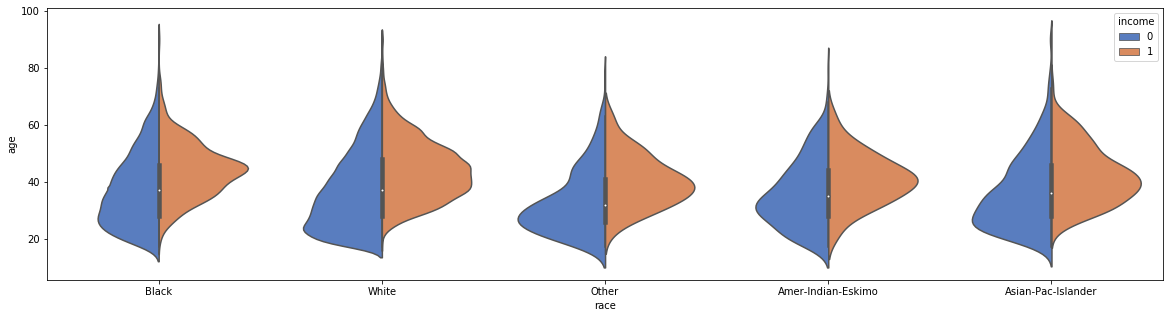

In [67]:
a4_dims = (20, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x="race", y="age", hue="income",data=df, gridsize=100, palette="muted", split=True, saturation=0.75)

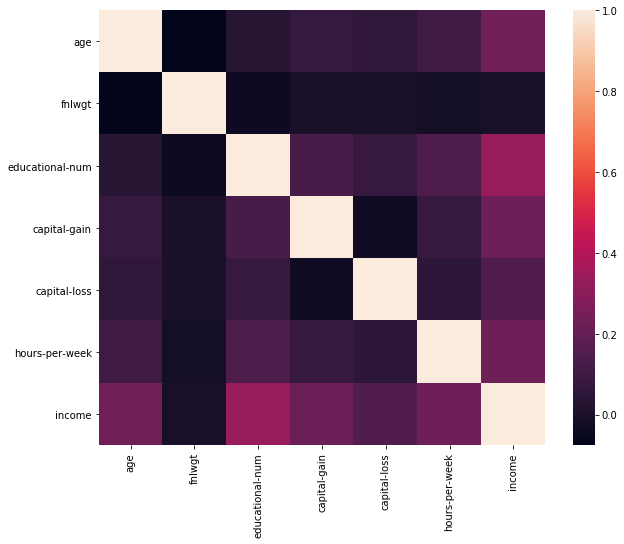

In [69]:
_, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)